Predicción meteorológica con gráfico
Los meteorólogos recopilan datos de humedad y presión atmosférica para predecir si lloverá o no.

Tu misión es construir un sistema inteligente que pueda predecir la probabilidad de lluvia utilizando un modelo de regresión logística.

🧩 Pasos a seguir

Crea la clase WeatherRecord:
Representará un registro de condiciones meteorológicas con:

Humedad (%)

Presión atmosférica (hPa)

Lluvia (1 si llovió, 0 si no)

Crea la clase WeatherDataGenerator:
Deberá generar registros sintéticos simulando que:

Alta humedad y baja presión aumentan la probabilidad de lluvia.

Baja humedad y alta presión indican que no lloverá.

Crea la clase WeatherRainClassifier:
Que entrene un modelo de regresión logística utilizando los datos generados. Debe incluir:

Método fit(records) para entrenar.

Método predict(humidity, pressure) que devuelva 1 o 0.

Método get_model() para obtener el modelo scikit-learn (útil para visualización).

Crea la clase WeatherPredictionExample:
Que haga lo siguiente:

Genere datos.

Entrene el modelo.

Haga una predicción para nuevas condiciones climáticas.

Muestre un gráfico con matplotlib diferenciando los casos de lluvia y no lluvia.



🎯 Ejemplo de uso

example = WeatherRainPredictionExample()
example.run()


📊 Salida esperada

[[21  0]
 [ 0 39]]
              precision    recall  f1-score   support
 
           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39
 
    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60
 
🔍 Predicción para condiciones nuevas:
   Humedad: 80%
   Presión: 995 hPa
   ¿Lloverá?: Sí ☔



[[22  0]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        38

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


🔍 Predicción para condiciones nuevas:
   Humedad: 80%
   Presión: 995 hPa
   ¿Lloverá?: Sí ☔


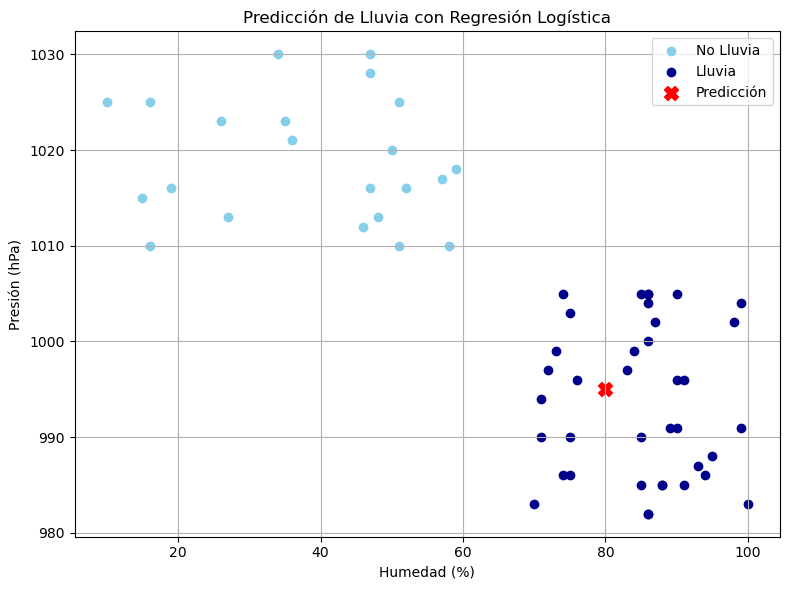

In [1]:
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

class WeatherRecord:
    def __init__(self, humidity, pressure, rain):
        self.humidity = humidity
        self.pressure = pressure
        self.rain = rain

class WeatherDataGenerator:
    def __init__(self, n_samples=60):
        self.n_samples = n_samples

    def generate(self):
        records = []
        for _ in range(self.n_samples):
            # Datos que probablemente no tengan lluvia
            if random.random() < 0.5:
                humidity = random.randint(10, 60)
                pressure = random.randint(1010, 1030)
                rain = 0
            # Datos que probablemente sí tengan lluvia
            else:
                humidity = random.randint(70, 100)
                pressure = random.randint(980, 1005)
                rain = 1
            records.append(WeatherRecord(humidity, pressure, rain))
        return records

class WeatherRainClassifier:
    def __init__(self):
        self.model = LogisticRegression()

    def fit(self, records):
        X = [[r.humidity, r.pressure] for r in records]
        y = [r.rain for r in records]
        self.model.fit(X, y)

    def predict(self, humidity, pressure):
        return int(self.model.predict([[humidity, pressure]])[0])

    def get_model(self):
        return self.model

class WeatherRainPredictionExample:
    def run(self):
        # 1. Generar datos
        generator = WeatherDataGenerator()
        records = generator.generate()

        # 2. Entrenar modelo
        classifier = WeatherRainClassifier()
        classifier.fit(records)

        # 3. Evaluar modelo
        X = [[r.humidity, r.pressure] for r in records]
        y_true = [r.rain for r in records]
        y_pred = classifier.get_model().predict(X)

        print(confusion_matrix(y_true, y_pred))
        print(classification_report(y_true, y_pred))

        # 4. Hacer una predicción nueva
        new_humidity = 80
        new_pressure = 995
        prediction = classifier.predict(new_humidity, new_pressure)
        print("\n🔍 Predicción para condiciones nuevas:")
        print(f"   Humedad: {new_humidity}%")
        print(f"   Presión: {new_pressure} hPa")
        print(f"   ¿Lloverá?: {'Sí ☔' if prediction == 1 else 'No 🌤️'}")

        # 5. Gráfico
        no_rain = [(r.humidity, r.pressure) for r in records if r.rain == 0]
        rain = [(r.humidity, r.pressure) for r in records if r.rain == 1]

        plt.figure(figsize=(8, 6))
        plt.scatter(*zip(*no_rain), color='skyblue', label='No Lluvia')
        plt.scatter(*zip(*rain), color='darkblue', label='Lluvia')
        plt.scatter(new_humidity, new_pressure, color='red', label='Predicción', marker='X', s=100)
        plt.xlabel('Humedad (%)')
        plt.ylabel('Presión (hPa)')
        plt.title('Predicción de Lluvia con Regresión Logística')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
example = WeatherRainPredictionExample()
example.run()